In \[30\]:

    import pandas as pd 
    import matplotlib.pyplot as plt 
    import seaborn as sns 
    import numpy as np 
    import scipy
    import math
    import scipy.stats as stats
    from scipy.stats import chi2_contingency

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler

    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import cross_val_predict

In \[31\]:

    import warnings

    warnings.filterwarnings('ignore')

In \[32\]:

    # read in data
    ob_data = pd.read_csv('Ob_data/ObesityDataSet_raw_and_data_sinthetic.csv')

In \[33\]:

    ob_data.head()

Out\[33\]:

|     | Gender | Age  | Height | Weight | family_history_with_overweight | FAVC | FCVC | NCP | CAEC      | SMOKE | CH2O | SCC | FAF | TUE | CALC       | MTRANS                | NObeyesdad          |
|-----|--------|------|--------|--------|--------------------------------|------|------|-----|-----------|-------|------|-----|-----|-----|------------|-----------------------|---------------------|
| 0   | Female | 21.0 | 1.62   | 64.0   | yes                            | no   | 2.0  | 3.0 | Sometimes | no    | 2.0  | no  | 0.0 | 1.0 | no         | Public_Transportation | Normal_Weight       |
| 1   | Female | 21.0 | 1.52   | 56.0   | yes                            | no   | 3.0  | 3.0 | Sometimes | yes   | 3.0  | yes | 3.0 | 0.0 | Sometimes  | Public_Transportation | Normal_Weight       |
| 2   | Male   | 23.0 | 1.80   | 77.0   | yes                            | no   | 2.0  | 3.0 | Sometimes | no    | 2.0  | no  | 2.0 | 1.0 | Frequently | Public_Transportation | Normal_Weight       |
| 3   | Male   | 27.0 | 1.80   | 87.0   | no                             | no   | 3.0  | 3.0 | Sometimes | no    | 2.0  | no  | 2.0 | 0.0 | Frequently | Walking               | Overweight_Level_I  |
| 4   | Male   | 22.0 | 1.78   | 89.8   | no                             | no   | 2.0  | 1.0 | Sometimes | no    | 2.0  | no  | 0.0 | 0.0 | Sometimes  | Public_Transportation | Overweight_Level_II |

In \[34\]:

    ob_data.shape

Out\[34\]:

    (2111, 17)

In \[35\]:

    # check ages are within normal age range 
    print(ob_data.Age.min())
    print(ob_data.Age.max())

    14.0
    61.0

In \[36\]:

    # check for missing values
    ob_data.isnull().sum()

Out\[36\]:

    Gender                            0
    Age                               0
    Height                            0
    Weight                            0
    family_history_with_overweight    0
    FAVC                              0
    FCVC                              0
    NCP                               0
    CAEC                              0
    SMOKE                             0
    CH2O                              0
    SCC                               0
    FAF                               0
    TUE                               0
    CALC                              0
    MTRANS                            0
    NObeyesdad                        0
    dtype: int64

In \[37\]:

    # rename the target column
    ob_data.rename(columns={'NObeyesdad': 'Target' }, inplace=True)

In \[38\]:

    ob_data.columns

Out\[38\]:

    Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
           'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
           'CALC', 'MTRANS', 'Target'],
          dtype='object')

In \[39\]:

    # calculate bmi 

    bmi = lambda row: row.Weight / row.Height**2

    ob_data['BMI'] = ob_data.apply(bmi, axis =1)

In \[40\]:

    ob_data.head()

Out\[40\]:

|     | Gender | Age  | Height | Weight | family_history_with_overweight | FAVC | FCVC | NCP | CAEC      | SMOKE | CH2O | SCC | FAF | TUE | CALC       | MTRANS                | Target              | BMI       |
|-----|--------|------|--------|--------|--------------------------------|------|------|-----|-----------|-------|------|-----|-----|-----|------------|-----------------------|---------------------|-----------|
| 0   | Female | 21.0 | 1.62   | 64.0   | yes                            | no   | 2.0  | 3.0 | Sometimes | no    | 2.0  | no  | 0.0 | 1.0 | no         | Public_Transportation | Normal_Weight       | 24.386526 |
| 1   | Female | 21.0 | 1.52   | 56.0   | yes                            | no   | 3.0  | 3.0 | Sometimes | yes   | 3.0  | yes | 3.0 | 0.0 | Sometimes  | Public_Transportation | Normal_Weight       | 24.238227 |
| 2   | Male   | 23.0 | 1.80   | 77.0   | yes                            | no   | 2.0  | 3.0 | Sometimes | no    | 2.0  | no  | 2.0 | 1.0 | Frequently | Public_Transportation | Normal_Weight       | 23.765432 |
| 3   | Male   | 27.0 | 1.80   | 87.0   | no                             | no   | 3.0  | 3.0 | Sometimes | no    | 2.0  | no  | 2.0 | 0.0 | Frequently | Walking               | Overweight_Level_I  | 26.851852 |
| 4   | Male   | 22.0 | 1.78   | 89.8   | no                             | no   | 2.0  | 1.0 | Sometimes | no    | 2.0  | no  | 0.0 | 0.0 | Sometimes  | Public_Transportation | Overweight_Level_II | 28.342381 |

In \[41\]:

    # plot the height vs the weight variables
    plt.scatter(ob_data.Height, ob_data.Weight, marker='.')
    plt.xlabel('Height kg')
    plt.ylabel('Weight m')

    # create a regression line and plot it to the graph 
    reg = scipy.stats.linregress(ob_data.Height, ob_data.Weight)
    slope = reg.slope
    intercept = reg.intercept

    line_function = 'y = {}x + {}'.format(round(slope, 4), round(intercept, 2))
    plt.plot(ob_data.Height, intercept + (slope*ob_data.Height), label = line_function, color='r' )
    plt.legend()
    plt.show()

![](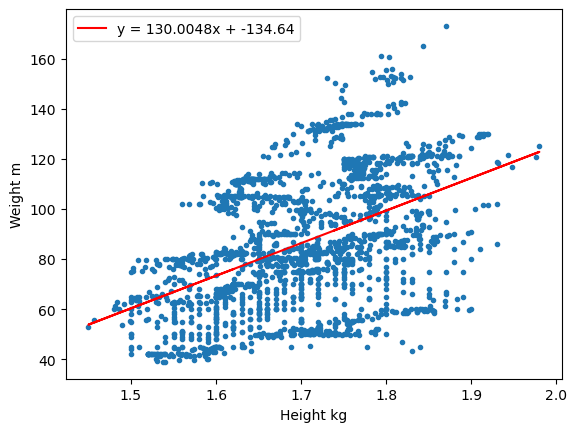%0A)

In \[42\]:

    scipy.stats.pearsonr(ob_data.Height, ob_data.Weight)

Out\[42\]:

    PearsonRResult(statistic=0.46313611661562676, pvalue=1.0184197731891681e-112)

In \[43\]:

    ob_data.drop(['Height', 'Weight'], axis=1, inplace=True)

In \[44\]:

    ob_data.Target.unique()

Out\[44\]:

    array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
           'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
           'Obesity_Type_III'], dtype=object)

In \[45\]:

    # create a contingency table to display the categories of obesity and whether the individual reported a family history

    ct_FH = pd.crosstab(ob_data.Target, ob_data.family_history_with_overweight)
    ct_FH

Out\[45\]:

| family_history_with_overweight | no  | yes |
|--------------------------------|-----|-----|
| Target                         |     |     |
| Insufficient_Weight            | 146 | 126 |
| Normal_Weight                  | 132 | 155 |
| Obesity_Type_I                 | 7   | 344 |
| Obesity_Type_II                | 1   | 296 |
| Obesity_Type_III               | 0   | 324 |
| Overweight_Level_I             | 81  | 209 |
| Overweight_Level_II            | 18  | 272 |

In \[46\]:

    # perform X2 test and print results 
    # alpha value of 0.05
    chi2_stat, p_val, dof, expected = chi2_contingency(ct_FH)

    print("Chi-squared statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of freedom:", dof)

    Chi-squared statistic: 621.9794353945298
    P-value: 4.2280167944702657e-131
    Degrees of freedom: 6

In \[47\]:

    # bar chart showing mean activity leavels for the different categories 

    # calculate mean and sort categories 
    target_pa = ob_data.groupby('Target').FAF.mean().reset_index()
    target_pa = target_pa.sort_values(by='FAF', ascending=False)
    print(target_pa)

    # plot bar chart
    plt.bar(target_pa.Target, target_pa.FAF)
    plt.ylabel('mean physcial activity level')
    plt.tick_params(axis='x', rotation=90)
    plt.show()

    # could perform anova 

                    Target       FAF
    0  Insufficient_Weight  1.250131
    1        Normal_Weight  1.247387
    5   Overweight_Level_I  1.056796
    2       Obesity_Type_I  0.986748
    3      Obesity_Type_II  0.971857
    6  Overweight_Level_II  0.958072
    4     Obesity_Type_III  0.664817

![](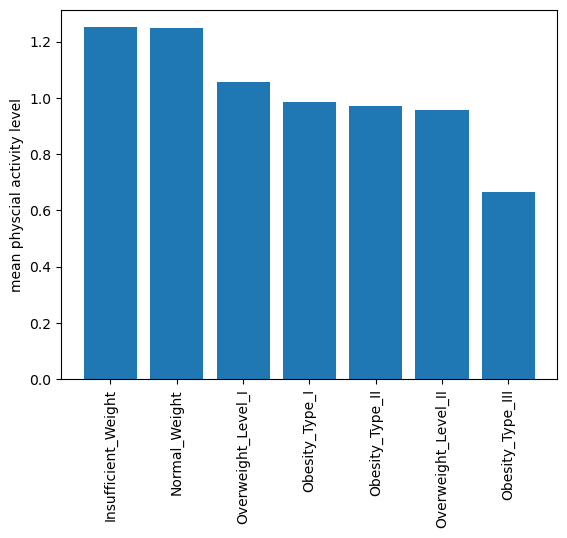%0A)

In \[48\]:

    # boxplot of BMI
    plt.boxplot(ob_data.BMI)
    plt.xlabel('BMI')
    plt.show()

![](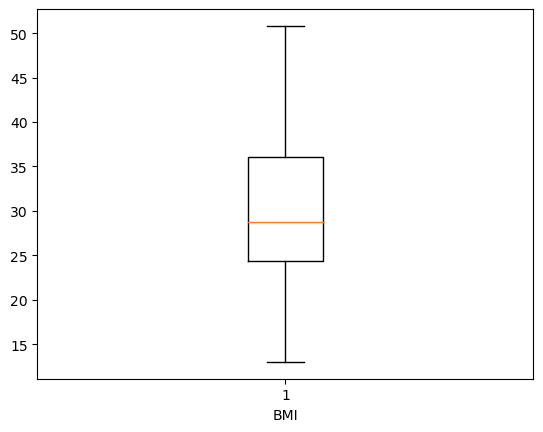%0A)

## Prep data for machine learning<a href="#Prep-data-for-machine-learning" class="anchor-link">¶</a>

In \[49\]:

    ob_data = ob_data.drop('BMI', axis=1)

In \[50\]:

    # encode categorical variables 

In \[51\]:

    #ob_data.head()

In \[52\]:

    # ob_data.FAVC.unique() # high cal foods
    # ob_data.CAEC.unique() # foods between meals 
    # ob_data.FCVC.min()
    # ob_data.FCVC.max()
    # #ob_data.FCVC.unique()
    # #ob_data.CH2O.min()
    # ob_data.TUE.max()

In \[53\]:

    # binary features:

    # fam history - map
    # gender - map
    # SCC - monitor calories - map
    # SMOKE - map
    # FAVC - do you eat high cal foods - map

    #cont
    # FCVC - freq of veg eaten - between 1 and 3
    #CH2O - 1-3
    # TUE - use technology - 0-2
    #age
    #height
    #weight
    # FAF - PA 


    # ordinal features:
    # NCP - no of main meals 
    # CAEC - eat food between meals - map
    # CALC - alcohol - map

    # nominal 
    # MTRAS - transprotation used - map

    # target - = obseity category 

In \[54\]:

    ob_data.CALC.unique()

Out\[54\]:

    array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In \[55\]:

    #map vaules to ordinal features

    CAEC_bands = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    ob_data['CAEC'] = ob_data['CAEC'].map(CAEC_bands)

    CALC_bands = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    ob_data['CALC'] = ob_data['CALC'].map(CALC_bands)

In \[56\]:

    # print(ob_data.Gender.unique())
    # print(ob_data.family_history_with_overweight.unique())
    # print(ob_data.SCC.unique())
    # print(ob_data.SMOKE.unique())
    # print(ob_data.FAVC.unique())

In \[57\]:

    # map binary features 

    # fam history - map
    # gender - map
    # SCC - monitor calories - map
    # SMOKE - map
    # FAVC - do you eat high cal foods - map

    binary_vals = {'yes': 1, 'no': 0 }
    ob_data['family_history_with_overweight'] = ob_data['family_history_with_overweight'].map(binary_vals)
    ob_data['SCC'] = ob_data['SCC'].map(binary_vals)
    ob_data['SMOKE'] = ob_data['SMOKE'].map(binary_vals)
    ob_data['FAVC'] = ob_data['FAVC'].map(binary_vals)

    gender_vals = {'Female': 1, 'Male': 0 }
    ob_data['Gender'] = ob_data['Gender'].map(gender_vals)

In \[58\]:

    # print(ob_data.Gender.unique())
    # print(ob_data.family_history_with_overweight.unique())
    # print(ob_data.SCC.unique())
    # print(ob_data.SMOKE.unique())
    # print(ob_data.FAVC.unique())

In \[59\]:

    # map nomial features 

    ob_data = pd.get_dummies(ob_data, columns=['MTRANS'])

Split into sets

In \[60\]:

    X = ob_data.drop(labels = ['Target'], axis = 1)
    y = ob_data['Target']

In \[61\]:

    x_train, x_remain, y_train, y_remain = train_test_split(X, y, train_size=0.7, random_state=42)

    x_valid, x_test, y_valid, y_test = train_test_split(x_remain, y_remain, test_size=0.5)

In \[62\]:

    print(x_train.shape), print(y_train.shape)
    print(x_valid.shape), print(y_valid.shape)
    print(x_test.shape), print(y_test.shape)

    (1477, 18)
    (1477,)
    (317, 18)
    (317,)
    (317, 18)
    (317,)

Out\[62\]:

    (None, None)

Normalise Data - for models that use distance

In \[63\]:

    #normalise 
    norm = MinMaxScaler().fit(x_train)

    # scale the train and test sets
    X_train = norm.transform(x_train)
    X_test = norm.transform(x_test)
    X_valid = norm.transform(x_valid)

    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    X_valid = pd.DataFrame(X_valid, columns=X.columns)

In \[64\]:

    # hyperparameter tuning for: 

    # SVM 

    #RF - n_est and criterion 

    # KNN - k

    # logistic regression

In \[65\]:

    # SVM

    # ovr - one v rest - for multiclass classification
    svm = SVC(decision_function_shape='ovr')

    parameters = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}

    clf_svm = GridSearchCV(svm, parameters, cv=5)
    clf_svm.fit(X_train, y_train)

Out\[65\]:

    GridSearchCV(cv=5, estimator=SVC(),
                 param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                             'kernel': ['linear', 'poly', 'rbf']})

In \[66\]:

    print(clf_svm.best_estimator_)

    df = pd.concat([pd.DataFrame(clf_svm.cv_results_['params']), pd.DataFrame(clf_svm.cv_results_['mean_test_score'], columns=['Score'])] ,axis=1)
     
    cv_table = df.pivot(index='kernel', columns=['C', 'gamma'])
     
    print(cv_table)

    SVC(C=100, gamma=1)
               Score                                                               
    C          0.1                                     1.0                         
    gamma      0.1       1.0       10.0      100.0     0.1       1.0       10.0    
    kernel                                                                         
    linear  0.509114  0.509114  0.509114  0.509114  0.586290  0.586290  0.586290  \
    poly    0.296539  0.731871  0.742016  0.725765  0.531470  0.752178  0.727121   
    rbf     0.422462  0.589015  0.379826  0.219336  0.578188  0.720362  0.750841   

                                                                                   
    C                    10.0                                    100.0             
    gamma      100.0     0.1       1.0       10.0      100.0     0.1       1.0     
    kernel                                                                         
    linear  0.586290  0.627607  0.627607  0.627607  0.627607  0.633023  0.633023  \
    poly    0.725765  0.661484  0.762991  0.726443  0.725765  0.731871  0.742016   
    rbf     0.487458  0.686530  0.773170  0.763697  0.506409  0.746083  0.783312   

                                
    C                           
    gamma      10.0      100.0  
    kernel                      
    linear  0.633023  0.633023  
    poly    0.726443  0.725765  
    rbf     0.767082  0.506409  

In \[67\]:

    # Random Forest 

    rf = RandomForestClassifier()

    parameters = {'n_estimators': [100, 200, 500, 1000], 'criterion': ['gini', 'entropy']}

    clf_rf = GridSearchCV(rf, parameters, cv=5)
    clf_rf.fit(X_train, y_train)

Out\[67\]:

    GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                 param_grid={'criterion': ['gini', 'entropy'],
                             'n_estimators': [100, 200, 500, 1000]})

In \[68\]:

    df = pd.concat([pd.DataFrame(clf_rf.cv_results_['params']), pd.DataFrame(clf_rf.cv_results_['mean_test_score'], columns=['Score'])] ,axis=1)
     
    cv_table = df.pivot(index='n_estimators', columns='criterion')
     
    print(cv_table)

    print(clf_rf.best_estimator_)
    #clf_rf.cv_results_['mean_test_score']

                     Score          
    criterion      entropy      gini
    n_estimators                    
    100           0.854425  0.853763
    200           0.858495  0.856468
    500           0.854432  0.858488
    1000          0.855101  0.852400
    RandomForestClassifier(criterion='entropy', n_estimators=200)

In \[69\]:

    # KNN

    knn = KNeighborsClassifier()

    parameters = {'n_neighbors': np.arange(1, 50), 'metric': ['cosine', 'euclidean', 'manhattan']}

    clf_knn = GridSearchCV(knn, parameters, cv=5)
    clf_knn.fit(X_train, y_train)

Out\[69\]:

    GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                 param_grid={'metric': ['cosine', 'euclidean', 'manhattan'],
                             'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
           18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
           35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In \[70\]:

    print(clf_knn.best_estimator_)
    print(clf_knn.cv_results_['mean_test_score'])

    KNeighborsClassifier(metric='manhattan', n_neighbors=1)
    [0.75082455 0.70953962 0.73188273 0.71970224 0.7291869  0.7068415
     0.69263857 0.68382272 0.68383188 0.67299588 0.66621622 0.65877462
     0.66012597 0.65268667 0.65200641 0.65065277 0.64590472 0.64049473
     0.63439075 0.63235227 0.62490609 0.62558635 0.61948236 0.61542144
     0.61068713 0.60661933 0.59781951 0.59646358 0.59104672 0.58698351
     0.58089556 0.57412735 0.57615437 0.57142006 0.5653344  0.56464956
     0.56464956 0.55923271 0.55991296 0.55314705 0.55382043 0.54975492
     0.54434494 0.54163307 0.54231104 0.53689876 0.53757215 0.53621851
     0.53283326 0.74270041 0.71157123 0.73256299 0.72106963 0.72648191
     0.70413651 0.69533898 0.69127119 0.68112689 0.67774164 0.66420064
     0.66285158 0.65607192 0.65268438 0.64862116 0.64726294 0.64455566
     0.63981448 0.63573981 0.63303481 0.62897389 0.62219881 0.62016262
     0.6154306  0.60798213 0.60662162 0.6005268  0.60188273 0.59444343
     0.59240495 0.58834631 0.58090243 0.57615437 0.57548557 0.57142006
     0.56600092 0.56667659 0.56126202 0.55787448 0.55380898 0.55177966
     0.55178195 0.545694   0.54230646 0.54366239 0.53825011 0.54028172
     0.53960376 0.53486486 0.7697847  0.75220568 0.75423729 0.75762483
     0.74543976 0.73528172 0.73189418 0.72646816 0.71631929 0.70345625
     0.69669262 0.68788594 0.68247137 0.68247595 0.6682524  0.66284013
     0.662153   0.65877462 0.64793862 0.6465781  0.64049473 0.64184379
     0.6357421  0.62964956 0.6262689  0.61881127 0.61474576 0.6093312
     0.60595282 0.60188731 0.59512139 0.59173156 0.58767064 0.58292487
     0.58022904 0.5815781  0.5815781  0.57548328 0.57345854 0.56804398
     0.56871049 0.56262025 0.56262025 0.5612689  0.56127348 0.55517865
     0.55044205 0.54773477 0.54773935]

In \[71\]:

    # ada boosting 
    base_classifier = DecisionTreeClassifier(max_depth=1)

    parameters = {'n_estimators': [100, 500, 1000], 'learning_rate': [0.1, 0.5, 1, 1.5, 2]}

    abc = AdaBoostClassifier(base_classifier)

    clf_abc = GridSearchCV(abc,  parameters, cv=5)
    clf_abc.fit(X_train, y_train)

Out\[71\]:

    GridSearchCV(cv=5,
                 estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
                 param_grid={'learning_rate': [0.1, 0.5, 1, 1.5, 2],
                             'n_estimators': [100, 500, 1000]})

In \[72\]:

    print(clf_abc.best_estimator_)
    #print(clf_abc.cv_results_['mean_test_score'])

    df = pd.concat([pd.DataFrame(clf_abc.cv_results_['params']), pd.DataFrame(clf_abc.cv_results_['mean_test_score'], columns=['Score'])] ,axis=1)
     
    cv_table = df.pivot(index='n_estimators', columns='learning_rate')
    print(cv_table)

    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                       learning_rate=1.5, n_estimators=500)
                      Score                                        
    learning_rate       0.1       0.5       1.0       1.5       2.0
    n_estimators                                                   
    100            0.398108  0.369679  0.350648  0.415678  0.314835
    500            0.345291  0.394762  0.348630  0.471207  0.353479
    1000           0.347341  0.394755  0.353385  0.465779  0.337208

In \[73\]:

    # gradient boosting 
    parameters = {'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 0.5, 1, 1.5]}

    gb = GradientBoostingClassifier()

    clf_gb = GridSearchCV(gb, parameters, cv=5)
    clf_gb.fit(X_train, y_train)

Out\[73\]:

    GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                 param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 1.5],
                             'n_estimators': [100, 500, 1000]})

In \[74\]:

    print(clf_gb.best_estimator_)
    #print(clf_gb.cv_results_['mean_test_score'])

    df = pd.concat([pd.DataFrame(clf_gb.cv_results_['params']), pd.DataFrame(clf_gb.cv_results_['mean_test_score'], columns=['Score'])] ,axis=1)
     
    cv_table = df.pivot(index='n_estimators', columns='learning_rate')
    print(cv_table)

    GradientBoostingClassifier(n_estimators=500)
                      Score                                        
    learning_rate      0.01      0.10      0.50      1.00      1.50
    n_estimators                                                   
    100            0.681111  0.813126  0.815174  0.803646  0.264865
    500            0.786716  0.825337  0.817877  0.812442  0.270277
    1000           0.806356  0.825323  0.818555  0.809049  0.255373

Cross Validation

In \[84\]:

    #prepare algorithms to test
    models = []

    models.append(('SVC', SVC(C=100, gamma=1)))
    models.append(('RF', RandomForestClassifier(n_estimators=200, criterion='entropy')))
    models.append(('kNN', KNeighborsClassifier(metric='manhattan', n_neighbors=1)))
    models.append(('ABC', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=1.5, n_estimators=500)))
    models.append(('GB', GradientBoostingClassifier(n_estimators=500)))



    #evaluate each algorithm
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
        
    #boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    SVC: 0.788049 (0.035019)
    RF: 0.855084 (0.030698)
    kNN: 0.781274 (0.043519)
    ABC: 0.448111 (0.059562)
    GB: 0.830010 (0.027313)

![](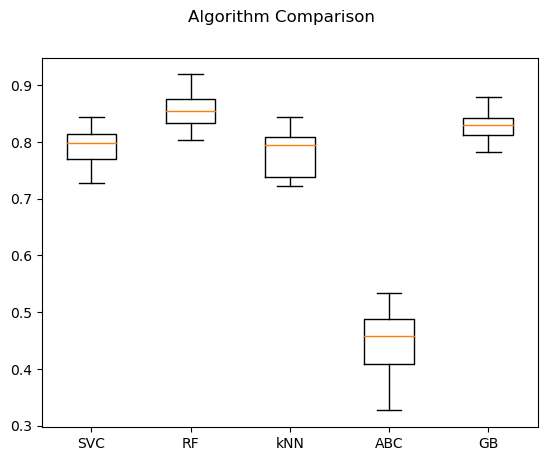%0A)

In \[85\]:

    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results, patch_artist=True)
    ax.set_xticklabels(names)
    plt.ylabel('Accuracy')
    plt.show()

![](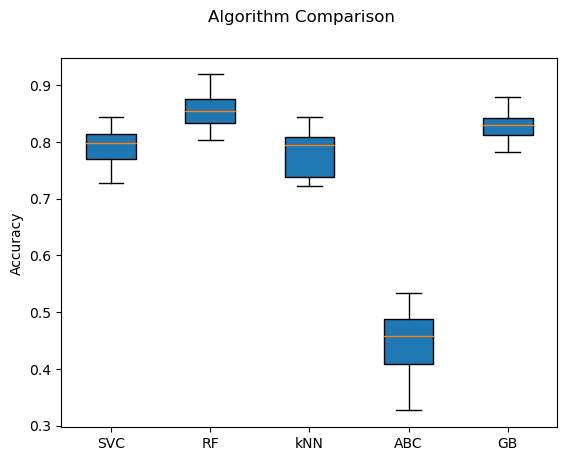%0A)

In \[86\]:

    rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

    rf_model.fit(X_train, y_train)

    y_predict = rf_model.predict(X_valid)

    print(accuracy_score(y_valid, y_predict))
    #print(precision_score(y_valid, y_predict))
    #print(recall_score(y_valid, y_predict))
    print(f1_score(y_valid, y_predict, average='weighted'))
    print(f1_score(y_valid, y_predict, average='macro'))

    0.8264984227129337
    0.829971603428906
    0.8229327527573143

In \[87\]:

    y_prob = rf_model.predict_proba(X_valid)
    score = roc_auc_score(y_valid, y_prob, multi_class='ovr')

In \[88\]:

    score

Out\[88\]:

    0.9736933867698075

In \[89\]:

    importances = rf_model.feature_importances_

    feature_names = [f"{i}" for i in X_train] 

    feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 8))
    feature_importances.plot(kind='barh', color='green')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance using RandomForestClassifier')
    plt.show()

![](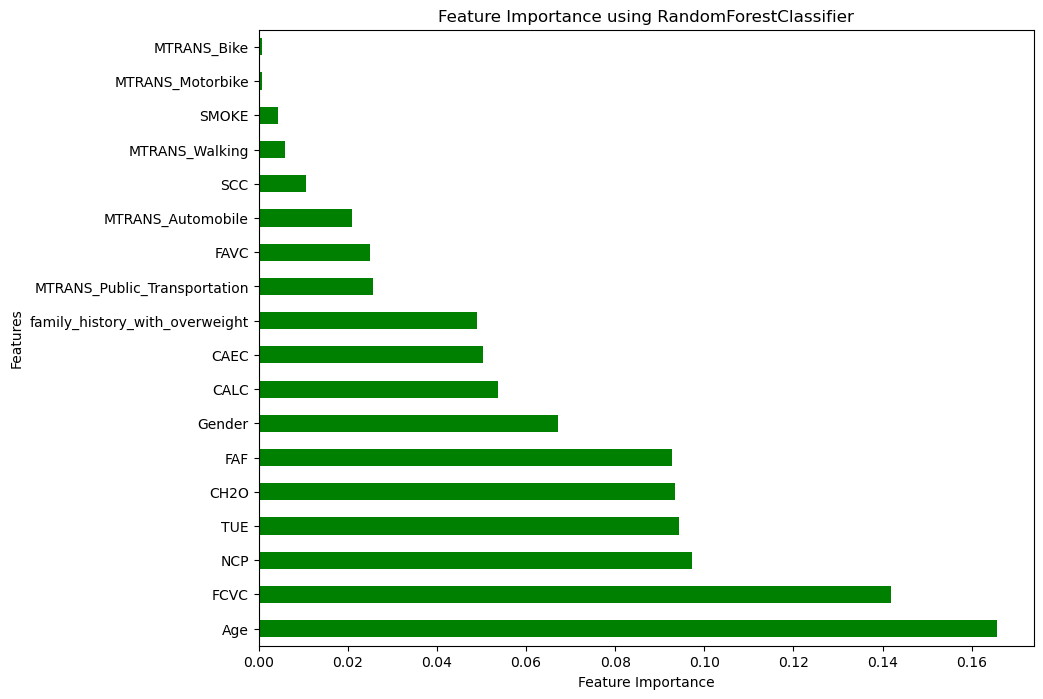%0A)

In \[ \]:

     

In \[ \]:

     

In \[ \]: